In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the diabetes dataset (assumed to be in CSV format)
data = pd.read_csv('/content/diabetes.csv')


In [ ]:
# 1. Data Head:
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [ ]:
# 2. Check for Missing Values:
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
# 3. Check for Duplicates:
print("\nDuplicate Rows:", data.duplicated().sum())



Duplicate Rows: 0


In [ ]:
# 4. Check Data Types:
print("\nData Types:\n", data.dtypes)


Data Types:
 Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
# 5. Descriptive Statistics:
print("\nDescriptive Statistics:\n", data.describe())


Descriptive Statistics:
        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      

In [ ]:
# 6. Check for Outliers (using IQR method as an example):
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
print("\nPotential Outliers (using IQR method):\n", outliers)


Potential Outliers (using IQR method):
 Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [ ]:
# 7. Data Imbalance (if it's a classification problem):
if 'Outcome' in data.columns:  # Assuming 'Outcome' is the target variable
    print("\nOutcome Distribution:\n", data['Outcome'].value_counts())


Outcome Distribution:
 Outcome
0    500
1    268
Name: count, dtype: int64


In [ ]:
# Group data by 'Outcome' and calculate the mean of other features
outcome_comparison = data.groupby('Outcome').mean()

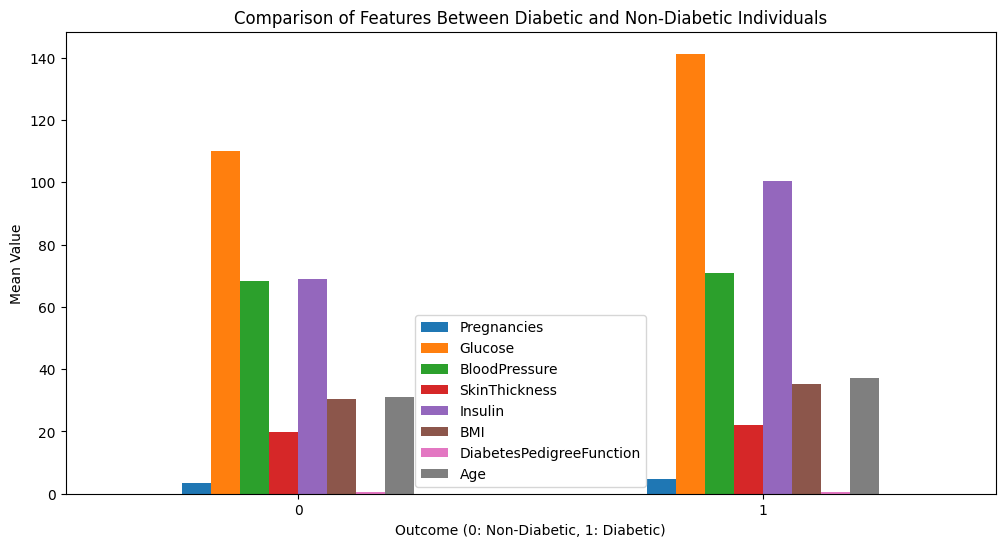

In [ ]:
# Create a bar plot for comparison
outcome_comparison.plot(kind='bar', figsize=(12, 6))
plt.title('Comparison of Features Between Diabetic and Non-Diabetic Individuals')
plt.xlabel('Outcome (0: Non-Diabetic, 1: Diabetic)')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='best')
plt.show()

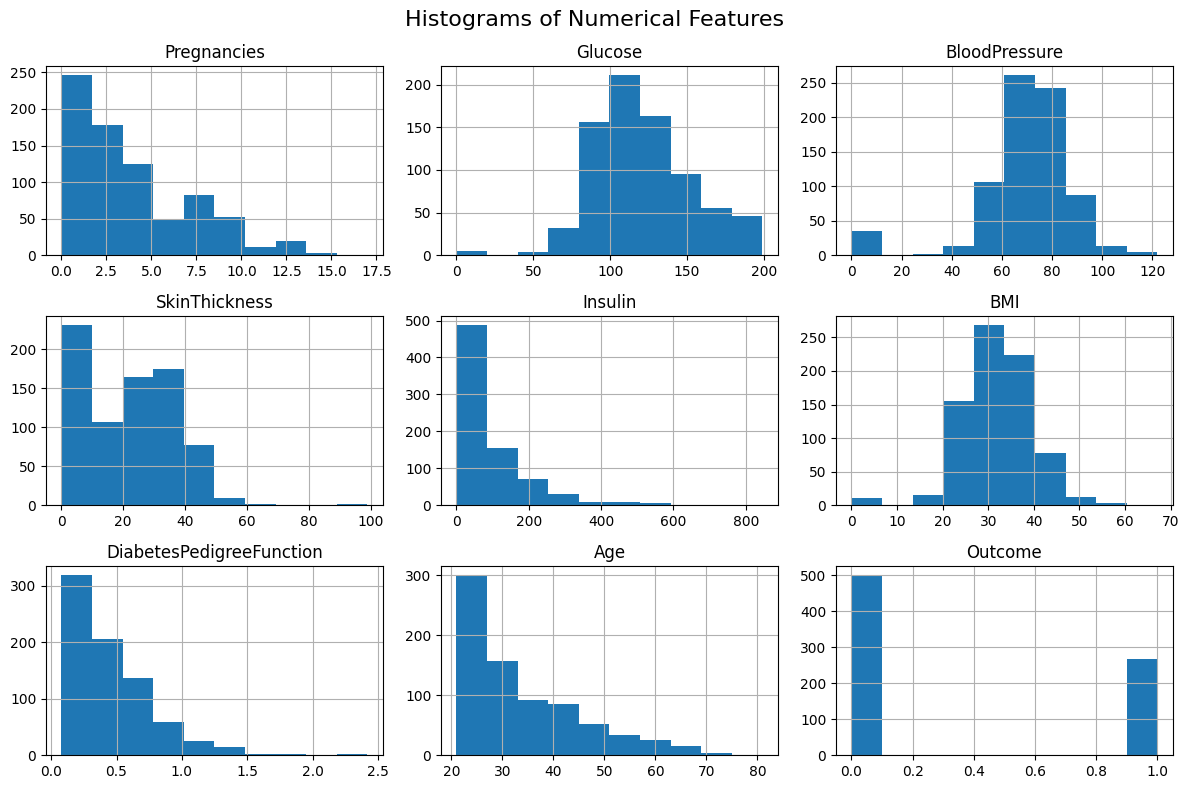

In [ ]:
# 1. Histograms for Numerical Features:
data.hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

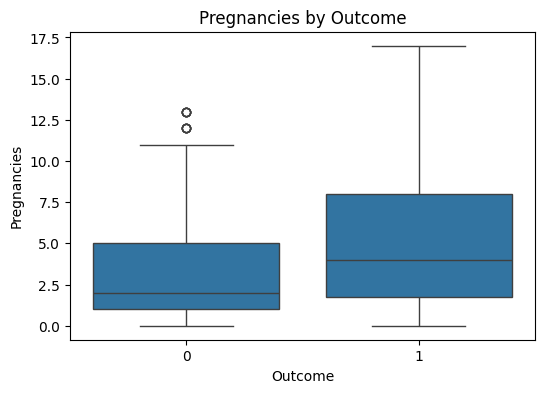

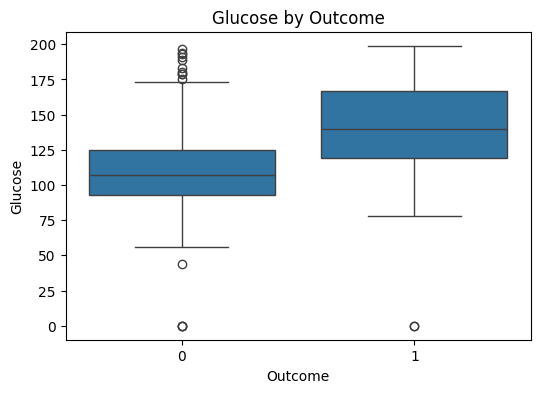

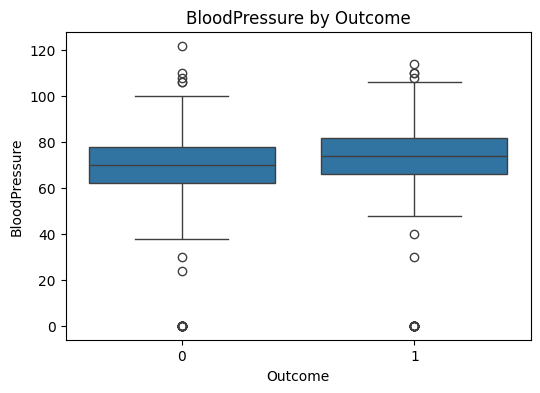

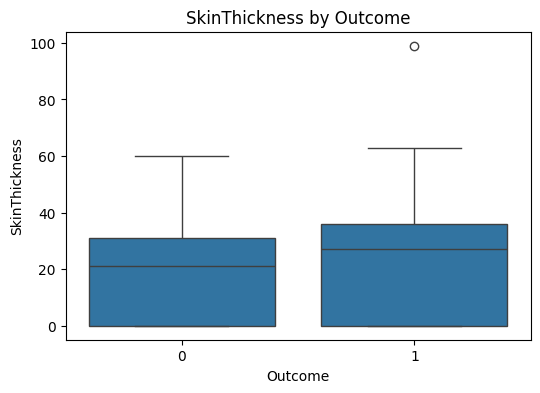

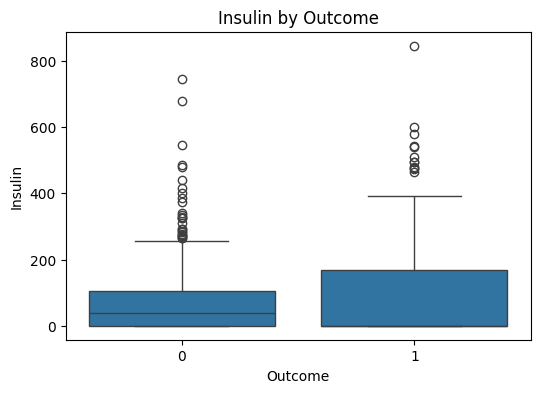

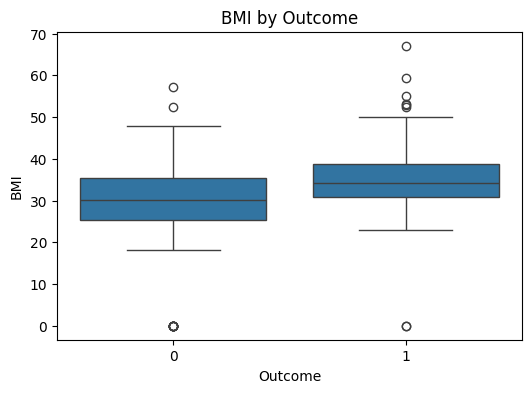

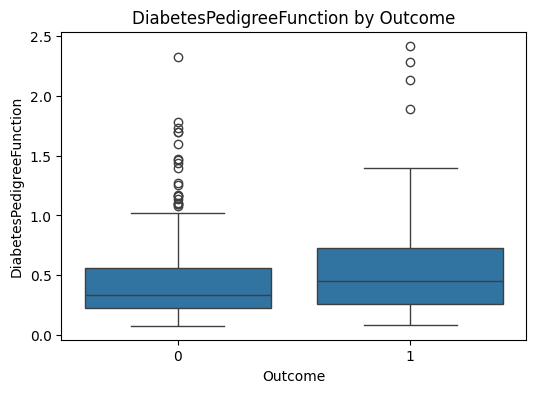

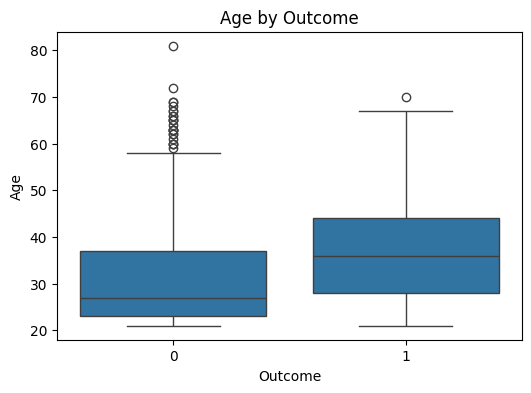

In [ ]:
# 2. Box Plots for Numerical Features by Outcome:
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Outcome', y=feature, data=data)
    plt.title(f'{feature} by Outcome')
    plt.show()

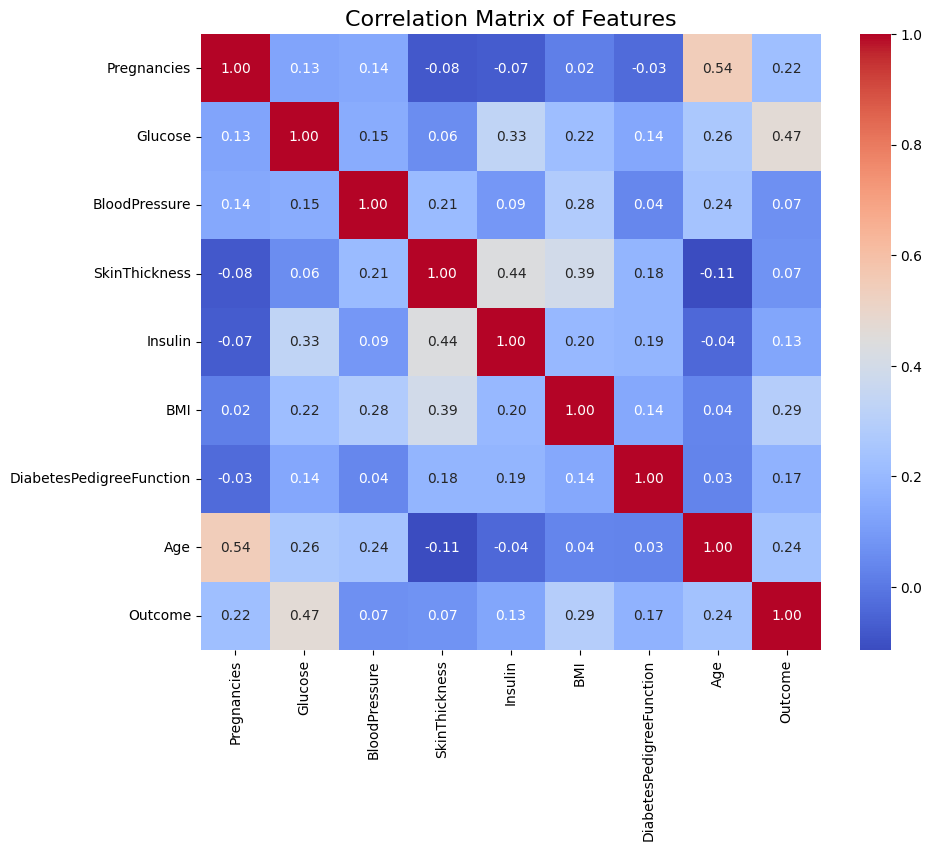

In [ ]:
# 3. Correlation Matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features', fontsize=16)
plt.show()

In [ ]:
# Separate the features (X) and the target variable (y)
X = data.drop('Outcome', axis=1)  # Features (independent variables)
y = data['Outcome']               # Target (dependent variable)

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize the Standard Scaler
scaler = StandardScaler()

In [ ]:
# Fit the scaler to the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Initialize the Logistic Regression Classifier
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Initialize the Support Vector Machine Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Initialize the K-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
# Make predictions on the test set with all models
y_pred_rf = rf_classifier.predict(X_test_scaled)
y_pred_lr = logistic_classifier.predict(X_test_scaled)
y_pred_svm = svm_classifier.predict(X_test_scaled)
y_pred_knn = knn_classifier.predict(X_test_scaled)

In [ ]:
# Evaluate the models
print(f'Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf) * 100:.2f}%')
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 75.76%
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231

Random Forest Confusion Matrix:
[[122  29]
 [ 27  53]]


In [ ]:
print(f'\nLogistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr) * 100:.2f}%')
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 73.59%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       151
           1       0.62      0.62      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

Logistic Regression Confusion Matrix:
[[120  31]
 [ 30  50]]


In [ ]:
print(f'\nSVM Accuracy: {accuracy_score(y_test, y_pred_svm) * 100:.2f}%')
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))


SVM Accuracy: 74.89%
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.62      0.63        80

    accuracy                           0.75       231
   macro avg       0.72      0.72      0.72       231
weighted avg       0.75      0.75      0.75       231

SVM Confusion Matrix:
[[123  28]
 [ 30  50]]


In [ ]:
print(f'\nKNN Accuracy: {accuracy_score(y_test, y_pred_knn) * 100:.2f}%')
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Accuracy: 70.13%
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78       151
           1       0.57      0.54      0.55        80

    accuracy                           0.70       231
   macro avg       0.67      0.66      0.67       231
weighted avg       0.70      0.70      0.70       231

KNN Confusion Matrix:
[[119  32]
 [ 37  43]]


In [ ]:
# Function to make predictions for a new patient's data
def predict_diabetes(input_data, scaler, rf_classifier, logistic_classifier, svm_classifier, knn_classifier):
    """
    input_data: A list or array containing the features in the following order:
    [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
    scaler: The scaler object used to scale the training data
    rf_classifier: The trained Random Forest classifier
    logistic_classifier: The trained Logistic Regression classifier
    svm_classifier: The trained Support Vector Machine classifier
    knn_classifier: The trained K-Nearest Neighbors classifier
    """
    # Convert the input data to a numpy array and reshape it for a single prediction
    input_data_as_array = np.array(input_data).reshape(1, -1)

    # Scale the input data using the same scaler used for the training data
    input_data_scaled = scaler.transform(input_data_as_array)

    # Make predictions using all classifiers
    rf_prediction = rf_classifier.predict(input_data_scaled)
    lr_prediction = logistic_classifier.predict(input_data_scaled)
    svm_prediction = svm_classifier.predict(input_data_scaled)
    knn_prediction = knn_classifier.predict(input_data_scaled)

    # Return predictions from all models
    return {
        "Random Forest": rf_prediction[0],
        "Logistic Regression": lr_prediction[0],
        "SVM": svm_prediction[0],
        "KNN": knn_prediction[0],
        "Input Data": input_data
    }

# Example input data for prediction (values need to be replaced by actual patient data)
new_patient_data = [6, 148, 72, 35, 0, 33.6, 0.627, 50]

# Predict the outcome
predictions = predict_diabetes(new_patient_data, scaler, rf_classifier, logistic_classifier, svm_classifier, knn_classifier)
for model, prediction in predictions.items():
    if prediction == 1:
        print(f"{model}: Patient is likely diabetic with features: {predictions['Input Data']}")
    elif prediction != "Input Data":
        print(f"{model}: Patient is likely non-diabetic with features: {predictions['Input Data']}")

Random Forest: Patient is likely diabetic with features: [6, 148, 72, 35, 0, 33.6, 0.627, 50]
Logistic Regression: Patient is likely diabetic with features: [6, 148, 72, 35, 0, 33.6, 0.627, 50]
SVM: Patient is likely diabetic with features: [6, 148, 72, 35, 0, 33.6, 0.627, 50]
KNN: Patient is likely diabetic with features: [6, 148, 72, 35, 0, 33.6, 0.627, 50]
Input Data: Patient is likely non-diabetic with features: [6, 148, 72, 35, 0, 33.6, 0.627, 50]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
